<a href="https://colab.research.google.com/github/melekbairamova20/melekbairamova20/blob/main/Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

!kaggle datasets download -d aadityasinghal/facial-expression-dataset

Dataset URL: https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset
License(s): DbCL-1.0
 66% 40.0M/60.7M [00:00<00:00, 223MB/s]
100% 60.7M/60.7M [00:00<00:00, 240MB/s]


In [ ]:
!unzip /content/facial-expression-dataset.zip

Archive:  /content/facial-expression-dataset.zip
replace test/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# !kaggle datasets download -d yousefmohamed20/sentiment-images-classifier

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'


In [ ]:
def load_dataset(directory):
  image_paths = []
  labels = []

  for label in os.listdir(directory):
    for filename in os.listdir(os.path.join(directory,label)):
      image_path = os.path.join(directory, label, filename)
      image_paths.append(image_path)
      labels.append(label)

    print(label, "Completed")
  return image_paths, labels


In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
train = train.sample(frac=1).reset_index(drop=True)
train.head()


train Completed


,image,label
0,/content/train/train/angry,train
1,/content/train/train/sad,train
2,/content/train/train/fear,train
3,/content/train/train/disgust,train
4,/content/train/train/neutral,train


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_dir)
test.head()

test Completed


,image,label
0,/content/test/test/surprise,test
1,/content/test/test/sad,test
2,/content/test/test/angry,test
3,/content/test/test/fear,test
4,/content/test/test/neutral,test


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_dir = '/content/train'
test_dir = '/content/test'


train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'categorical',
                                               seed = 42)
test_data = test_datagen.flow_from_directory(test_dir,
                                            batch_size = 32,
                                            target_size = (224, 224),
                                            class_mode = 'categorical',
                                             seed = 42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           strides = 1,
                           padding = 'same',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'linear')

])


Found 28709 images belonging to 1 classes.
Found 7178 images belonging to 1 classes.


In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
print("Train data augmented:")
IMG_SIZE = (224, 224)

train_dataget_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                      target_size = IMG_SIZE,
                                                                      class_mode = 'categorical',
                                                                      batch_size = 32,
                                                                      shuffle = False
                                                                    )
print("Non-augmented train data:")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = IMG_SIZE,
                                               class_mode = 'categorical',
                                               batch_size = 32,
                                               shuffle = False)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             class_mode = 'categorical',
                                             batch_size = 32)

Train data augmented:
Found 28709 images belonging to 1 classes.
Non-augmented train data:
Found 28709 images belonging to 1 classes.
Non-augmented test data:
Found 7178 images belonging to 1 classes.


In [ ]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_dataget_augmented)

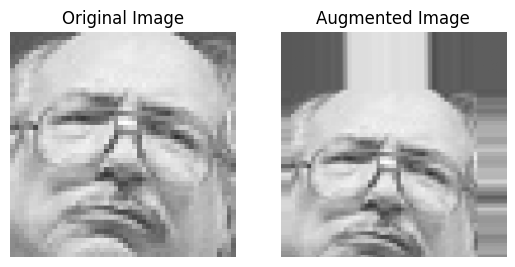

In [ ]:
import random
import matplotlib.pyplot as plt
random_number = random.randint(0, 31)
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)
plt.show()

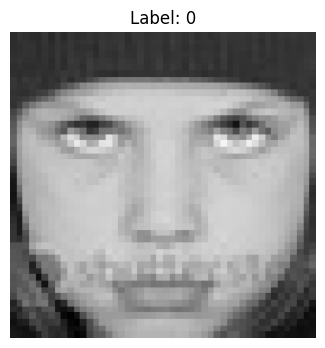

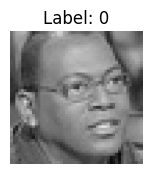

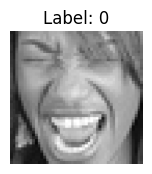

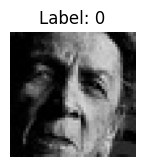

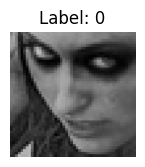

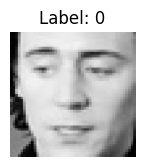

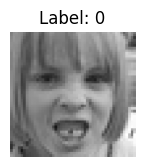

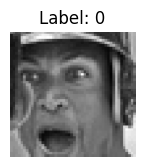

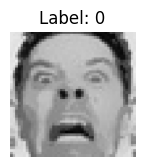

In [ ]:
images, labels = next(train_data)

plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(f"Label: {np.argmax(labels[i])}")
  plt.axis("off")

  plt.tight_layout()
  plt.show()

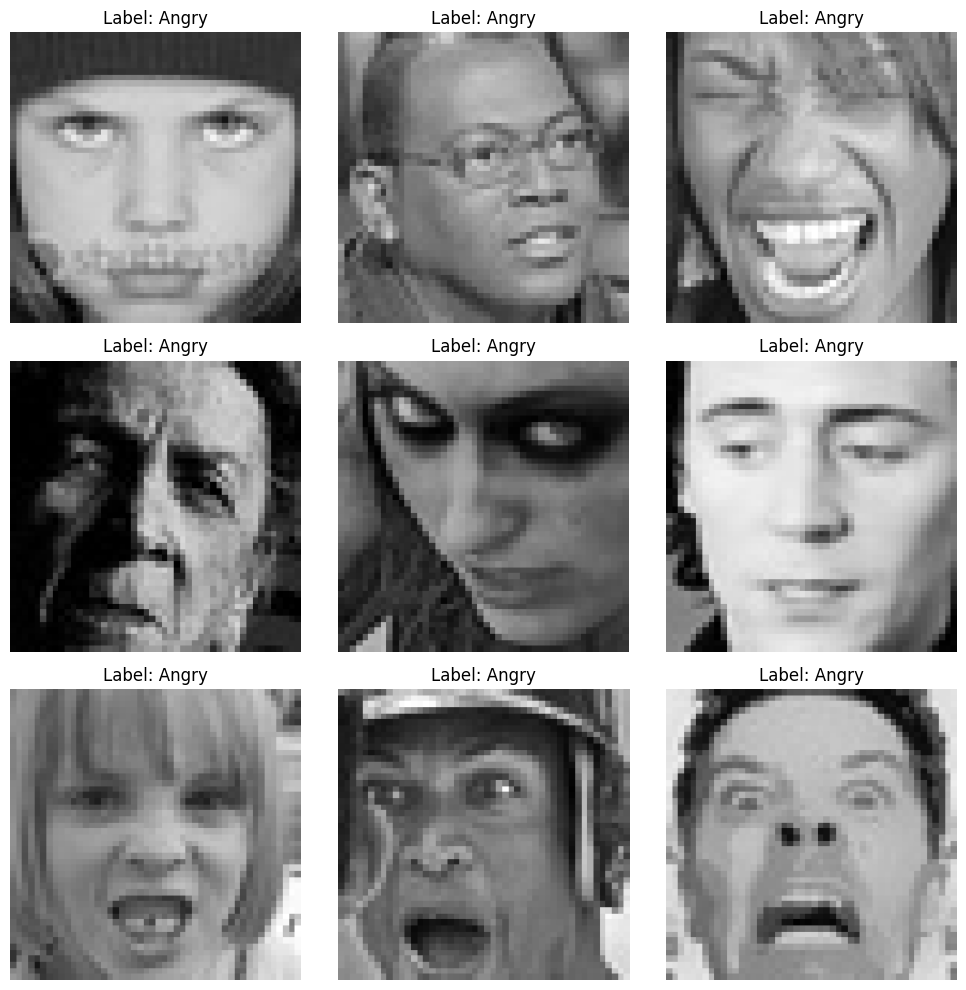

In [ ]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(f"Label: {emotion_labels[np.argmax(labels[i])]}")
  plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, epochs = 1, validation_data = test_data)

In [ ]:
# !kaggle datasets download -d yousefmohamed20/sentiment-images-classifier

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['train'], dtype='<U5')

In [ ]:
import random
random.choice(class_names)

'train'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               class_mode = 'sparse')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             class_mode = 'sparse')

Found 28709 images belonging to 1 classes.
Found 7178 images belonging to 1 classes.


In [ ]:
model_1_cat = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_uniform')
])


In [ ]:
model_1_cat.compile(loss = 'sparse_categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Nadam(),
                    metrics = ['accuracy'])

In [ ]:
history = model_1_cat.fit(train_data, epochs = 1, validation_data = (test_data))

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


894/898 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9918 - loss: 0.0319 